<a href="https://colab.research.google.com/github/dev-EthanJ/Basic_Python_with_Data_Crawling/blob/main/20221107_ML_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀 with 보험 예측

1. Data 수집

2. Data pre-processing

3. 모델 학습

4. 모델 평가

5. 모델 배포

In [1]:
import pandas as pd

## 1. Data 수집

In [2]:
file_name = 'insurance.csv' #@param{'type':'string'}
url = f'https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/{file_name}'

df = pd.read_csv(url)

df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
# 결측치 체크
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- 범주형 변수 `Dtype=object` > `df.describe()`로 확인할 수 없다

In [4]:
# pandas의 float data를 소수점 아래 2번째 자리까지 formatting
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# 기술통계
df.describe()

,age,bmi,children,expenses
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.67,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,16.00,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.70,2.00,16639.92
max,64.00,53.10,5.00,63770.43


## 2. Data pre-processing

- modeling하기 좋게 data를 다듬는다.

In [6]:
from sklearn.linear_model  import LinearRegression

### 2.1. 범주형 Data에 대한 전처리

In [7]:
# df.smoker object에 대한 전처리(수치화)
df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [8]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [9]:
# df.smoker == 'yes'
df.smoker.eq('yes')

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

In [10]:
# object(str)에 대한 수치화

# df.smoker.eq('yes') * 1
df.smoker.eq('yes').mul(1)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [11]:
df.smoker = df.smoker.eq('yes').mul(1)

df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,1,southwest,16884.92
1,18,male,33.80,1,0,southeast,1725.55
2,28,male,33.00,3,0,southeast,4449.46
3,33,male,22.70,0,0,northwest,21984.47
4,32,male,28.90,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.00,3,0,northwest,10600.55
1334,18,female,31.90,0,0,northeast,2205.98
1335,18,female,36.90,0,0,southeast,1629.83
1336,21,female,25.80,0,0,southwest,2007.95


In [12]:
df.sex.unique()

array(['female', 'male'], dtype=object)

<br>

- `obj.nuique()`: `obj.unique`의 결과 array의 item 개수

In [13]:
print(df.region.unique())
df.region.nunique()

['southwest' 'southeast' 'northwest' 'northeast']


4

In [14]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker        int64
region       object
expenses    float64
dtype: object

<br>

- `pd.get_dummies(DataFrame, columns=columns label list)` : columns label list를, 해당 column의 서로 다른 values를 각각 나타내는 새로운 columns가 추가된 DataFrame을 생성

  - parameter `drop_first=True`: `.get_dummies()`의 결과로 나온 columns중 첫 번째 column을 drop


In [15]:
df_dummy = pd.get_dummies(df, columns=['sex', 'region'], drop_first=True)

df_dummy

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,0,0,0,1
1,18,33.80,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.90,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1


### 2.2. 얕은 복사(shallow copy) vs. 깊은 복사(deep copy)

- shallow copy: `=` 연산자

- deep copy: `.copy()` method, `object` $\rightarrow$ `str` $\rightarrow$ `object`

In [16]:

copy_list = ['a', 'b', 'c', 'd']

obj_str = '.'.join(copy_list).split('.')

copy_list.append('e')

print(copy_list)
print(obj_str)

['a', 'b', 'c', 'd', 'e']
['a', 'b', 'c', 'd']


### 2.3. 훈련셋 `train set`, 시험셋 `test set`

- `train set`으로 훈련 된 결과로 만들어진 모델을 가지고 시험을 하면 `train set`에 대해서는 맞출 수 밖에 없음

- Data의 일부를 `test set`으로 독립시켜서, `train set`과 `test set`을 나눈다.

In [17]:
df_dummy

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,0,0,0,1
1,18,33.80,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.90,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1


In [18]:
df_dummy.columns

Index(['age', 'bmi', 'children', 'smoker', 'expenses', 'sex_male',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [19]:
# X: 독립변수, y: 종속변수
X = df_dummy.drop('expenses', axis=1)
y = df_dummy.expenses

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [22]:
# test_size: 비율 > test set(시험셋)의 ratio
# random_state: seed value > 임의로 결정되는 값을 특정 값으로 만드는

# len(train_test_split(X, y, test_size = 0.2, random_state=200))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 200
)

## 3. 모델 학습

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
#예측
X_pred = model.predict(X_test)

X_pred

array([11583.75098752,  8723.46560984,  7794.17799753,  8537.18904201,
        1900.99306943,  5000.1965654 , 40184.13707971,  4332.65458179,
       33604.62827378,  8566.77438349, 34761.58427257, 10617.81670868,
        9203.54356439,  6425.0666393 , 14236.30630426,  5926.50264561,
       15334.62115765, 27775.22335916, 11729.02225496, 10502.41605544,
       10966.06403594,  2757.84040418, 11719.86336504, 34984.82793476,
        5779.75874448,  -144.15498223, 25007.46443988, 10374.70604051,
        8619.47240785, 40243.70301175, 18891.94370162, 12035.16897936,
        5042.03755231,  3137.62318663,  4433.98245405,  9068.79116388,
       12923.54652222,  -601.63917125, 13236.88773829,  1919.81372069,
       30080.74972726, 38498.04504965, 28122.74348022, 12606.12034078,
       11730.91113956, 11933.2727501 , 16303.21034674, 12627.02280213,
        -338.02188294, 14181.44145783, 32937.55388043, 13037.92391076,
       16870.81536476, 33940.65858658, 13331.7608698 , 38656.52249415,
      

## 4. 모델 평가

In [27]:
comparison = pd.DataFrame(
    { 'actual':y_test, 'predict':X_pred}
)

comparison

,actual,predict
992,10118.42,11583.75
937,8965.80,8723.47
688,26236.58,7794.18
1185,8603.82,8537.19
1137,3176.29,1900.99
...,...,...
473,20878.78,11206.26
791,1252.41,960.58
1112,24180.93,33708.45
537,8825.09,10076.47


### 4.1. 모델 평가 시각화

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

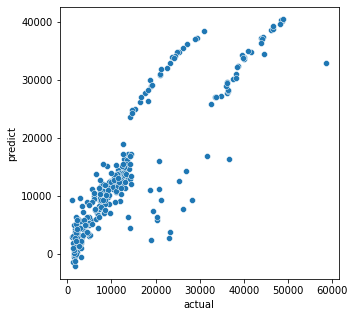

In [29]:
plt.figure(figsize=(5, 5))

sns.scatterplot(x = 'actual', y = 'predict', data = comparison)

### 4.2. `mean_squared_error`

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
# MSE(평균제곱오차): 예측값과 실제값의 오차의 제곱의 평균
mean_squared_error(y_test, X_pred)

36760484.5645236

In [32]:
# RMSE(평균제곱근오차): Root MSE
# mean_squared_error(y_test, X_pred) ** 0.5
mean_squared_error(y_test, X_pred, squared=False)

6063.042517129795

In [33]:
# R^2: 결정계수: 독립변수가 종속변수를 얼마나 잘 설명하는가를 수치화한 값
R_squared = model.score(X_train, y_train)

R_squared

0.7462462636958302

In [34]:
model.coef_

array([  262.45023678,   326.77442073,   551.41412416, 23798.72509414,
         -77.28662589,  -166.61566228,  -795.09255719,  -957.17123014])

In [35]:
pd.Series(model.coef_, index=X.columns)

age                  262.45
bmi                  326.77
children             551.41
smoker             23798.73
sex_male             -77.29
region_northwest    -166.62
region_southeast    -795.09
region_southwest    -957.17
dtype: float64

In [36]:
model.intercept_

-12010.489564845571

## 5. 모델 배포

In [37]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
# joblib 라이브러리를 통해 .pkl 파일 생성
import joblib 

joblib.dump(model, 'first_model.pkl')

['first_model.pkl']

In [39]:
# .pkl file로 파일단위 모델 이동 가능 
model_from_joblib = joblib.load('first_model.pkl')

pd.Series(model_from_joblib.coef_, index=X.columns)

age                  262.45
bmi                  326.77
children             551.41
smoker             23798.73
sex_male             -77.29
region_northwest    -166.62
region_southeast    -795.09
region_southwest    -957.17
dtype: float64